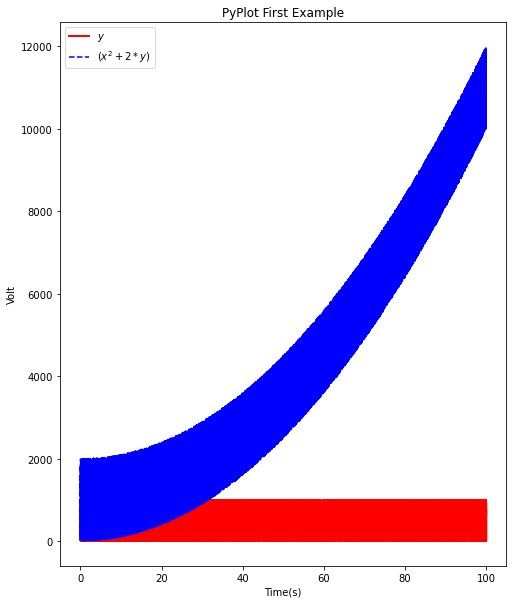

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 函数 z = x*x + 2*y, 生成 80000 个样本， x是从 0-100 之间均匀分布的8000个数字，y是<1000的80000个数字 ；
total = 80000
x = np.linspace(0, 100, total)
y = np.random.randint(1000,size=total)
z = x**2 + 2*y

plt.figure(figsize=(8,10))
plt.plot(x,y,label="$y$",color="red",linewidth=2)
plt.plot(x,z,"b--",label="$(x^2+2*y)$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("PyPlot First Example")
#plt.ylim(0, 15000)
plt.legend()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


# 读入数据
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#x_train.shape

#len(x_train[0])


(80000, 2)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

input = np.zeros([total,2])
print(input.shape)

output = np.zeros(total)

for i in range(total):
    input[i] = (x[i], y[i])
    output[i] = z[i]

print(input.shape)
print(output.shape)
print(input[0], output[0])
print(input[1], output[1])
print(input[2], output[2])
print(input[200], output[200])

(80000, 2)
(80000, 2)
(80000,)
[ 0. 59.] 118.0
[1.25001563e-03 4.15000000e+02] 830.0000015625391
[2.50003125e-03 1.47000000e+02] 294.0000062501563
[ 0.25000313 21.        ] 42.0625015625293


In [5]:
import tensorflow as tf
(x_train, y_train) = (input,output)

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(2,)),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.02),
              loss='mean_squared_error', metrics=['mae','mse'])

#训练模型
history = model.fit(x_train, y_train, epochs=15)

2021-11-07 18:00:10.893679: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-07 18:00:10.894338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


2021-11-07 18:00:11.315079: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-07 18:00:11.318284: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-07 18:00:11.459414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/15
2500/2500 [==============================] - 10s 4ms/step - loss: 905062.1250 - mae: 697.3808 - mse: 905062.1250
Epoch 2/15
2500/2500 [==============================] - 10s 4ms/step - loss: 411992.3750 - mae: 451.8226 - mse: 411992.3750
Epoch 3/15
2500/2500 [==============================] - 10s 4ms/step - loss: 320328.5625 - mae: 392.1287 - mse: 320328.5625
Epoch 4/15
2500/2500 [==============================] - 10s 4ms/step - loss: 262819.8438 - mae: 349.4919 - mse: 262819.8438
Epoch 5/15
2500/2500 [==============================] - 10s 4ms/step - loss: 217462.3281 - mae: 308.5135 - mse: 217462.3281
Epoch 6/15
2500/2500 [==============================] - 10s 4ms/step - loss: 181991.8594 - mae: 271.8238 - mse: 181991.8594
Epoch 7/15
2500/2500 [==============================] - 10s 4ms/step - loss: 157704.9062 - mae: 253.4466 - mse: 157704.9062
Epoch 8/15
2500/2500 [==============================] - 10s 4ms/step - loss: 141173.7344 - mae: 240.9149 - mse: 141173.7344
Epoch 9/

In [8]:
model.predict([[45,100],[10,20],[30,50],[60,80]])

array([[2271.7625],
       [ 336.1219],
       [1132.2782],
       [3892.6077]], dtype=float32)

In [6]:
import tensorflow as tf
(x_train, y_train) = (input,output)

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(2,)),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.02),
              loss='mean_squared_error', metrics=['mae','mse'])

#训练模型
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
  10/2500 [..............................] - ETA: 15s - loss: 30461462.0000 - mae: 4468.2798 - mse: 30461462.0000  

2021-10-25 00:14:56.579814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2500/2500 [==============================] - 16s 6ms/step - loss: 843013.7500 - mae: 618.9134 - mse: 843013.7500
Epoch 2/10
2500/2500 [==============================] - 15s 6ms/step - loss: 178815.0781 - mae: 293.3965 - mse: 178815.0781
Epoch 3/10
2500/2500 [==============================] - 16s 6ms/step - loss: 84607.8516 - mae: 197.8997 - mse: 84607.8516
Epoch 4/10
2500/2500 [==============================] - 15s 6ms/step - loss: 58478.6445 - mae: 163.4881 - mse: 58478.6445
Epoch 5/10
2500/2500 [==============================] - 16s 6ms/step - loss: 48564.8008 - mae: 154.2717 - mse: 48564.8008
Epoch 6/10
2500/2500 [==============================] - 16s 6ms/step - loss: 59235.3047 - mae: 156.4817 - mse: 59235.3047
Epoch 7/10
2500/2500 [==============================] - 16s 6ms/step - loss: 38436.9062 - mae: 146.4743 - mse: 38436.9062
Epoch 8/10
2500/2500 [==============================] - 16s 6ms/step - loss: 24910.1484 - mae: 118.6561 - mse: 24910.1484
Epoch 9/10
2500/2500 [=========

In [6]:
model.predict([[45,100],[10,20],[30,50],[60,80]])

NameError: name 'model' is not defined

In [10]:
import tensorflow as tf
(x_train, y_train) = (input,output)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(40, input_dim=2, activation='relu'),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.02),
              loss='mean_squared_error', metrics=['mae','mse'])

#训练模型
history = model.fit(x_train, y_train, epochs=15, batch_size=50)

model.predict([[45,100],[10,20],[30,50],[60,80]])

Epoch 1/15
   8/1600 [..............................] - ETA: 12s - loss: 25706038.0000 - mae: 4003.6877 - mse: 25706038.0000 

2021-11-07 18:23:34.976596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1600/1600 [==============================] - 13s 8ms/step - loss: 969170.8125 - mae: 680.8398 - mse: 969170.8125
Epoch 2/15
1600/1600 [==============================] - 13s 8ms/step - loss: 296651.6250 - mae: 361.7083 - mse: 296651.6250
Epoch 3/15
1600/1600 [==============================] - 13s 8ms/step - loss: 169997.9688 - mae: 255.5428 - mse: 169997.9688
Epoch 4/15
1600/1600 [==============================] - 12s 8ms/step - loss: 125974.0703 - mae: 217.3686 - mse: 125974.0703
Epoch 5/15
1600/1600 [==============================] - 13s 8ms/step - loss: 74774.6953 - mae: 165.8670 - mse: 74774.6953
Epoch 6/15
1600/1600 [==============================] - 13s 8ms/step - loss: 59363.4922 - mae: 144.4705 - mse: 59363.4922
Epoch 7/15
1600/1600 [==============================] - 13s 8ms/step - loss: 42491.9805 - mae: 123.6978 - mse: 42491.9805
Epoch 8/15
1600/1600 [==============================] - 12s 8ms/step - loss: 39725.0352 - mae: 115.9161 - mse: 39725.0352
Epoch 9/15
1600/1600 [=====

2021-11-07 18:26:43.790265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[2239.2454 ],
       [ 185.3527 ],
       [ 997.70325],
       [3800.0837 ]], dtype=float32)

In [11]:
model.predict([[45,100],[10,20],[30,50],[60,80]])


array([[2239.2454 ],
       [ 185.3527 ],
       [ 997.70325],
       [3800.0837 ]], dtype=float32)

In [12]:
z1 = [[45*45 + 2*100],[10*10 + 2*20],[30*30 + 2*50],[60*60 + 2*80]]
print(z1)

[[2225], [140], [1000], [3760]]


In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load training data
x = -50 + np.random.random((25000,1))*100
y = x**2

# Define model
model = Sequential()
model.add(Dense(40, input_dim=1, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='nadam')
model.fit(x, y, epochs=15, batch_size=50)

predictions = model.predict([10, 5, 200, 13])
print(predictions) # Approximately 100, 25, 40000, 169

Epoch 1/15
 16/500 [..............................] - ETA: 3s - loss: 1136574.7500

2021-10-25 00:42:11.099142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


500/500 [==============================] - 4s 7ms/step - loss: 467558.7500
Epoch 2/15
500/500 [==============================] - 4s 7ms/step - loss: 76887.2031
Epoch 3/15
500/500 [==============================] - 4s 7ms/step - loss: 70204.2031
Epoch 4/15
500/500 [==============================] - 4s 7ms/step - loss: 63154.7695
Epoch 5/15
500/500 [==============================] - 4s 7ms/step - loss: 55015.6797
Epoch 6/15
500/500 [==============================] - 4s 8ms/step - loss: 43992.3242
Epoch 7/15
500/500 [==============================] - 4s 7ms/step - loss: 28449.6973
Epoch 8/15
500/500 [==============================] - 4s 8ms/step - loss: 12716.1162
Epoch 9/15
500/500 [==============================] - 4s 8ms/step - loss: 4653.2744
Epoch 10/15
500/500 [==============================] - 4s 7ms/step - loss: 2385.0730
Epoch 11/15
500/500 [==============================] - 4s 7ms/step - loss: 1648.8446
Epoch 12/15
500/500 [==============================] - 4s 7ms/step - loss: 1

2021-10-25 00:43:06.677898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [14]:
print(model.layers)

[<keras.layers.core.Dense object at 0x166cbbbb0>, <keras.layers.core.Dense object at 0x166cbbc40>, <keras.layers.core.Dense object at 0x166cc3820>, <keras.layers.core.Dense object at 0x166cc3700>]


In [21]:
p = model.predict([[200,2000],[300,4000],[50,300]])
print(p)

[[30548.871 ]
 [47872.543 ]
 [ 3054.8225]]


In [20]:
z2= [200*200 + 2000*2, 300*300 + 4000*2, 50*50 + 300*2]
print(z2)

[44000, 98000, 3100]
